In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install kaggle

In [5]:
! mkdir ~/.kaggle

In [6]:
!cp /content/drive/MyDrive/Colab_Notebooks/kaggle_API_credeintials/kaggle.json ~/.kaggle/kaggle.json

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster

Dataset URL: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster
License(s): CC-BY-SA-4.0
  0% 0.00/57.5k [00:00<?, ?B/s]
100% 57.5k/57.5k [00:00<00:00, 156MB/s]


In [9]:
! unzip obesity-or-cvd-risk-classifyregressorcluster.zip

Archive:  obesity-or-cvd-risk-classifyregressorcluster.zip
  inflating: ObesityDataSet.csv      


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('/content/ObesityDataSet.csv')

In [12]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [14]:
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [15]:
df.rename(columns={'NObeyesdad':'Target'},inplace=True)
df['Target'].replace({'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':3,'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6},inplace=True)

<ipython-input-15-283162139>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Target'].replace({'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':3,'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6},inplace=True)
<ipython-input-15-283162139>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option

In [16]:
df = df.drop(['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE', 'SCC','CALC', 'MTRANS'],axis='columns')
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Target
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,2
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,3
...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,6
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,6
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,6
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,6


In [17]:
sns.pairplot(df, hue='Target')

Output hidden; open in https://colab.research.google.com to view.

In [18]:
!pip install tensorflow
!pip install keras
!pip install kneed

In [46]:
from numpy import loadtxt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [20]:
y = df['Target']
x = df.drop('Target',axis='columns')

In [21]:
SEED = 17
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1688, 8)
(423, 8)
(1688,)
(423,)


In [23]:
model = Sequential([
    Dense(64, input_dim=8, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='softmax')
 ])
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

# Evaluar
loss, acc = model.evaluate(x_test, y_test)
print(f'Accuracy: {acc:.2f}')

Epoch 1/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.1471 - loss: 5.4187 - val_accuracy: 0.1272 - val_loss: 2.0728
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1429 - loss: 2.2508 - val_accuracy: 0.1213 - val_loss: 2.0629
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1568 - loss: 2.1018 - val_accuracy: 0.1213 - val_loss: 2.0535
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1320 - loss: 2.0646 - val_accuracy: 0.1213 - val_loss: 2.0446
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1716 - loss: 2.0450 - val_accuracy: 0.1213 - val_loss: 2.0372
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1742 - loss: 2.0006 - val_accuracy: 0.1805 - val_loss: 1.9888
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1728 - loss: 1.9825 - val_accuracy: 0.2101 - val_loss: 1.8422
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.1917 - loss: 1.9270 - val_accuracy: 0

In [25]:
pred_probs = model.predict(x_test)
pred_classes = np.argmax(pred_probs, axis=1)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [37]:

conf_matrix = confusion_matrix(y_test, pred_classes)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[55  2  0  0  0  0  0]
 [11 36 13  1  0  0  0]
 [ 0  5 39 10  3  0  0]
 [ 0  1 24 19 20  0  0]
 [ 0  0  1  4 56  5  1]
 [ 0  0  0  0  0 49  8]
 [ 0  0  0  0  0  1 59]]


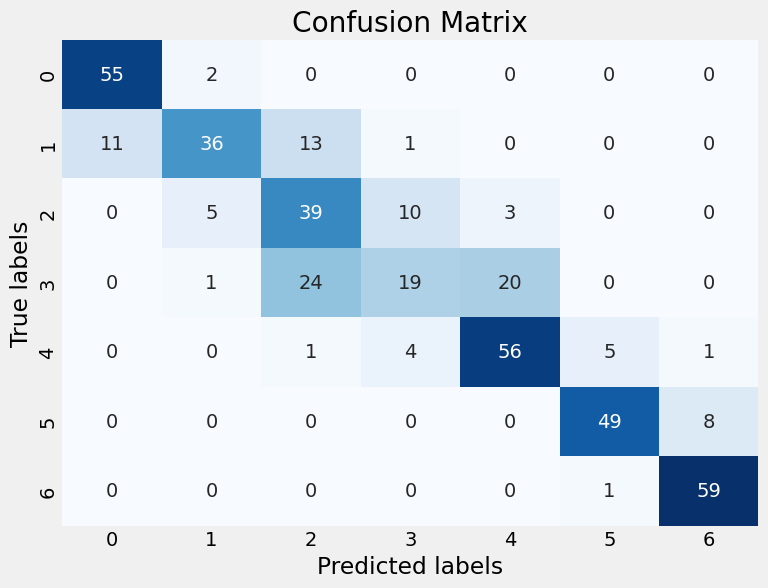

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [39]:
print("\nClassification Report:")
print(classification_report(y_test, pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        57
           1       0.82      0.59      0.69        61
           2       0.51      0.68      0.58        57
           3       0.56      0.30      0.39        64
           4       0.71      0.84      0.77        67
           5       0.89      0.86      0.88        57
           6       0.87      0.98      0.92        60

    accuracy                           0.74       423
   macro avg       0.74      0.74      0.73       423
weighted avg       0.74      0.74      0.73       423



In [43]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

array([[-0.52212439, -0.87558934, -0.86255819, ..., -0.01307326,
        -1.18803911,  0.56199675],
       [-0.52212439, -1.94759928, -1.16807699, ...,  1.61875854,
         2.33975012, -1.08062463],
       [-0.20688898,  1.05402854, -0.36609013, ..., -0.01307326,
         1.16382038,  0.56199675],
       ...,
       [-0.28190933,  0.54167211,  1.79886776, ...,  0.0753606 ,
         0.47497132, -0.01901815],
       [ 0.00777624,  0.40492652,  1.78577968, ...,  1.37780063,
         0.15147069, -0.11799101],
       [-0.10211908,  0.39834438,  1.7905916 , ...,  1.39603472,
         0.01899633,  0.09243207]])

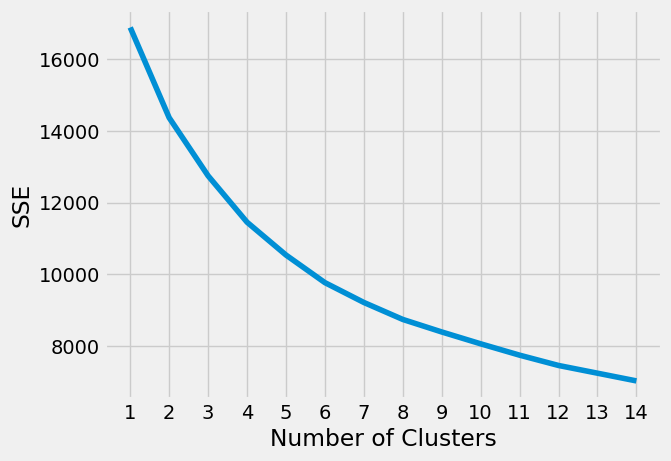

In [52]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [51]:
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

In [34]:
silhouette_coefficients = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

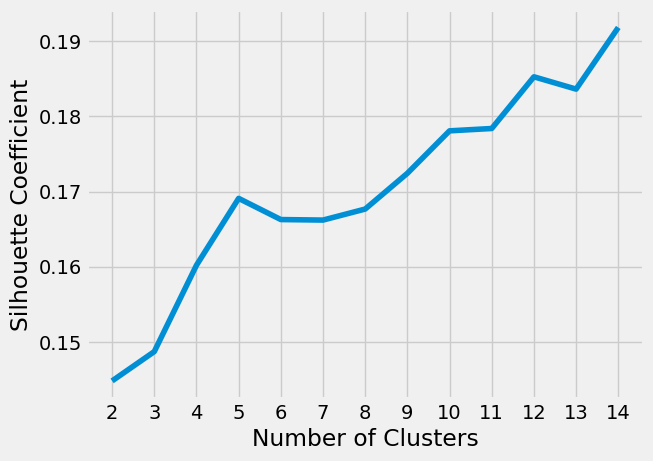

In [55]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [53]:
kl = KneeLocator(
    range(1, 15), sse, curve="convex", direction="decreasing"
)
kl.elbow

np.int64(6)

In [56]:
kmeans = KMeans(n_clusters=kl.elbow, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_
cluster_labels

array([3, 2, 2, ..., 1, 1, 1], dtype=int32)

In [50]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 20,
    "max_iter": 3000,
    "random_state": SEED,
}

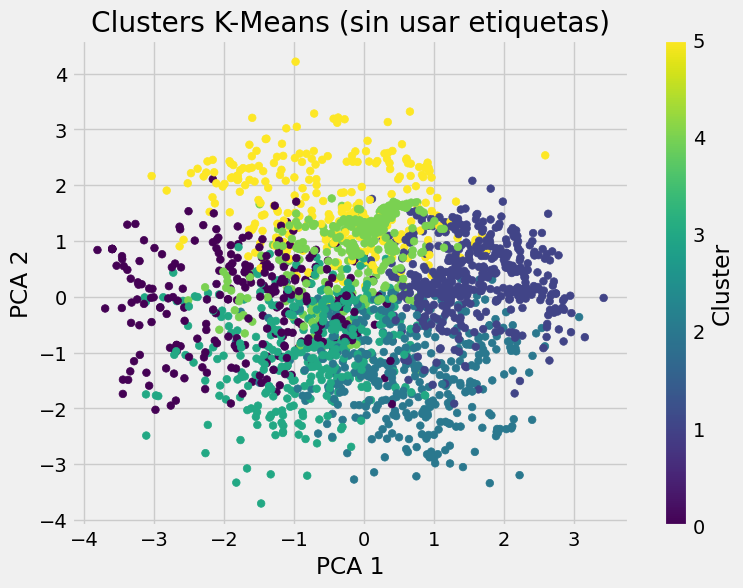

In [57]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=30)
plt.title('Clusters K-Means (sin usar etiquetas)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()